In [0]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import plotly.express as px
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("used_cars.csv")

In [0]:
df = df[['price', 'year', 'odometer', 'lat', 'long']]

Untuk melihat interakri antar feature, Indikasi adanya korelasi antar variabel adalah dari pola scatterplot yang membentuk garis diagonal

<function matplotlib.pyplot.show>

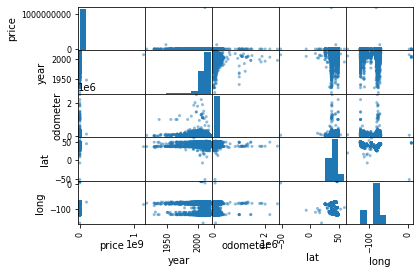

In [0]:
scatter_matrix(df)
plt.show

In [0]:
df.isnull().sum()

price          0
year          12
odometer    2389
lat         1031
long        1031
dtype: int64

In [0]:
df = df[['year','odometer']]

Mengisi missing value dengan mean dari featurenya. 

In [0]:
df = df.fillna(df.mean())

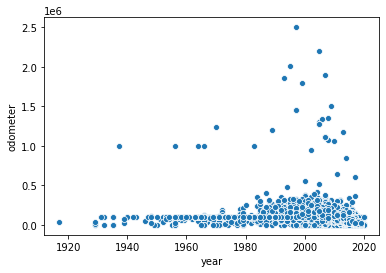

In [0]:
sns.scatterplot(x='year', y='odometer', data=df)

In [0]:
df.head(5)

,year,odometer
0,2012.0,63500.0
1,2016.0,10.0
2,2015.0,7554.0
3,2016.0,10.0
4,2018.0,70150.0


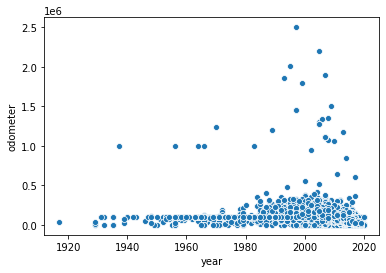

In [0]:
sns.scatterplot(x='year', y='odometer', data=df)

Melakukan scalling data dengan menggunakan metode MinMax, karena data antara kedua feature sangat berbeda jauh valuenya.

In [0]:
x = df.values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 2.5))
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

Text(0, 0.5, 'Odometer')

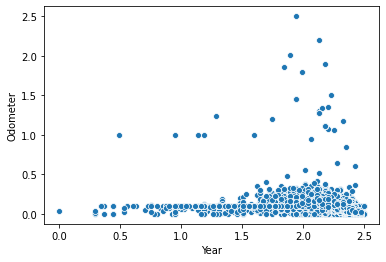

In [0]:
sns.scatterplot(x=0, y=1, data=df)
plt.xlabel('Year')
plt.ylabel('Odometer')

In [0]:
centroids={}
centroids[0] = [random.uniform(0, 2.5), random.uniform(0, 2.5)]
centroids[1] = [random.uniform(0, 2.5), random.uniform(0, 2.5)]
centroids[2] = [random.uniform(0, 2.5), random.uniform(0, 2.5)]

<function matplotlib.pyplot.show>

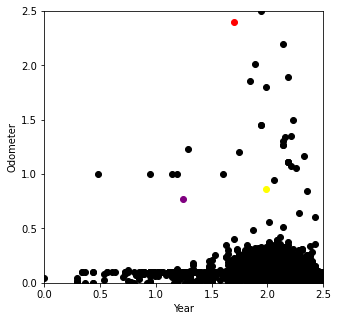

In [0]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df[0], df[1], color = 'k')
colmap = {0: 'red' , 1: 'purple' , 2: 'yellow'}
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,2.5)
plt.ylim(0,2.5)
plt.xlabel('Year')
plt.ylabel('Odometer')
plt.show

<function matplotlib.pyplot.show>

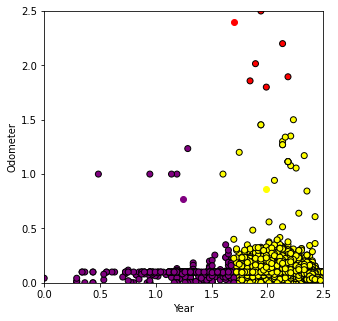

In [0]:
def Latih(df, centroids):
    for i in centroids.keys() :
        df['Jarak ke cenroid-{}'.format(i)] = (
            np.sqrt(
                (df[0] - centroids[i][0]) ** 2
                + (df[1] - centroids[i][1]) ** 2
            )
        )
    Jarak_Centroid = ['Jarak ke cenroid-{}'.format(i) for i in centroids.keys()]
    df['klaster'] = df.loc[:, Jarak_Centroid].idxmin(axis = 1)
    df['klaster'] = df['klaster'].map(lambda x: int(x.lstrip('Jarak ke cenroid-')))
    df['warna_klaster'] = df['klaster'].map(lambda x: colmap[x])

    return df

df = Latih(df, centroids)

fig = plt.figure(figsize=(5,5))
plt.scatter(df[0], df[1], color = df['warna_klaster'], alpha = 1 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,2.5)
plt.ylim(0,2.5)
plt.xlabel('Year')
plt.ylabel('Odometer')
plt.show

In [0]:
df.head(5)

,0,1,Jarak ke cenroid-0,Jarak ke cenroid-1,Jarak ke cenroid-2,klaster,warna_klaster
0,2.305825,0.063500,2.414734,1.279569,0.864059,2,yellow
1,2.402913,0.000010,2.501877,1.395568,0.961229,2,yellow
2,2.378641,0.007554,2.487878,1.371204,0.944105,2,yellow
3,2.402913,0.000010,2.501877,1.395568,0.961229,2,yellow
4,2.451456,0.070150,2.449192,1.399686,0.921997,2,yellow


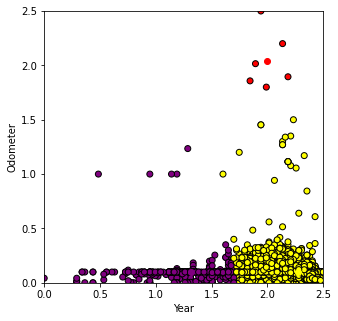

In [0]:
import copy

Centroid_Sebelum = copy.deepcopy(centroids)
def update(k) :
    for i in centroids.keys() :
        centroids[i][0] = np.mean(df[df['klaster'] == i ][0])
        centroids[i][1] = np.mean(df[df['klaster'] == i ][1])
    
    return k

centroids = update(centroids)

fig = plt.figure(figsize = (5,5))

Axis = plt.axes()
plt.scatter(df[0], df[1], color = df['warna_klaster'], alpha = 1 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,2.5)
plt.ylim(0,2.5)

for i in Centroid_Sebelum.keys() :
    old_x = Centroid_Sebelum[i][0]
    old_y = Centroid_Sebelum[i][1]
    dx = (centroids[i][0] - Centroid_Sebelum[i][0]) * 0.75
    dy = (centroids[i][1] - Centroid_Sebelum[i][1]) * 0.75

plt.xlabel('Year')
plt.ylabel('Odometer')
plt.show()

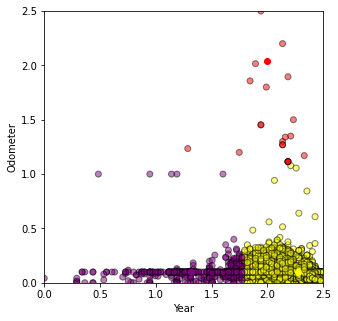

In [0]:
df = Latih(df,centroids)

fig = plt.figure(figsize = (5,5))
plt.scatter(df[0], df[1], color = df['warna_klaster'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])

plt.xlim(0,2.5)
plt.ylim(0,2.5)
plt.xlabel('Year')
plt.ylabel('Odometer')
plt.show()

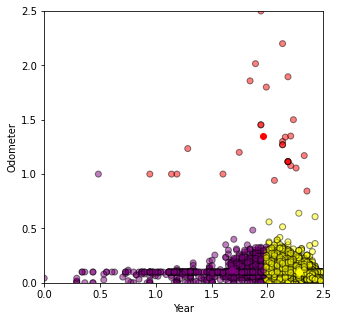

In [0]:
while True :
    Centroid_Terdekat = df['klaster'].copy(deep=True)
    centroids = update(centroids)
    df = Latih(df,centroids)

    if Centroid_Terdekat.equals(df['klaster']) :
        break

fig = plt.figure(figsize = (5,5))
plt.scatter(df[0], df[1], color = df['warna_klaster'], alpha = 0.5 , edgecolor='k')
for i in centroids.keys() :
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,2.5)
plt.ylim(0,2.5)
plt.xlabel('Year')
plt.ylabel('Odometer')
plt.show()

In [0]:
hasil = pd.read_csv("used_cars.csv")

In [0]:
hasil['kelas_label'] = df['klaster'] 

In [0]:
hasil

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long,kelas_label
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858,2
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884,2
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884,2
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884,2
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,7049052853,https://kpr.craigslist.org/ctd/d/pasco-diesels...,kennewick-pasco-richland,https://kpr.craigslist.org,49999,2016.0,ram,cummin 2500 laramie,NaN,NaN,diesel,43406.0,clean,automatic,3C6UR5FL7GG142137,4wd,NaN,truck,grey,https://images.craigslist.org/00h0h_d5xQ6Q7Ygd...,Call or Text 509-412-3404 2016 Dodge Ram 2500...,NaN,wa,46.2348,-119.128,2
19997,19997,7049052797,https://kpr.craigslist.org/ctd/d/yakima-2018-n...,kennewick-pasco-richland,https://kpr.craigslist.org,12127,2018.0,nissan,sentra,NaN,4 cylinders,gas,32867.0,clean,automatic,3N1AB7AP4JY251861,fwd,NaN,sedan,NaN,https://images.craigslist.org/00Y0Y_cuQ8XIP5R4...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496,2
19998,19998,7049049369,https://kpr.craigslist.org/ctd/d/walla-walla-2...,kennewick-pasco-richland,https://kpr.craigslist.org,0,2019.0,jeep,grand cherokee limited,NaN,6 cylinders,gas,17514.0,clean,automatic,1C4RJFBG9KC713921,4wd,NaN,SUV,NaN,https://images.craigslist.org/00h0h_gvXVsydGQd...,Chrysler Dodge Jeep Ram of Walla WallaÂ Â Â Â ...,NaN,wa,46.0783,-118.293,2
19999,19999,7049042761,https://kpr.craigslist.org/ctd/d/yakima-2017-t...,kennewick-pasco-richland,https://kpr.craigslist.org,14661,2017.0,toyota,corolla,NaN,4 cylinders,gas,30486.0,clean,automatic,2T1BURHE5HC804636,fwd,NaN,sedan,NaN,https://images.craigslist.org/00P0P_94PZlFJECu...,Bud Clary Toyota of YakimaÂ Â Â Â Â Â Â Â STOC...,NaN,wa,46.5642,-120.496,2


In [0]:
hasil.to_csv("used_cars2.csv")